In [287]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.patches as patches
import cv2
import numpy as np


In [288]:
class box : 
    def __init__(self, x1, y1, x2, y2) :
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2

CRAFT 초기모습


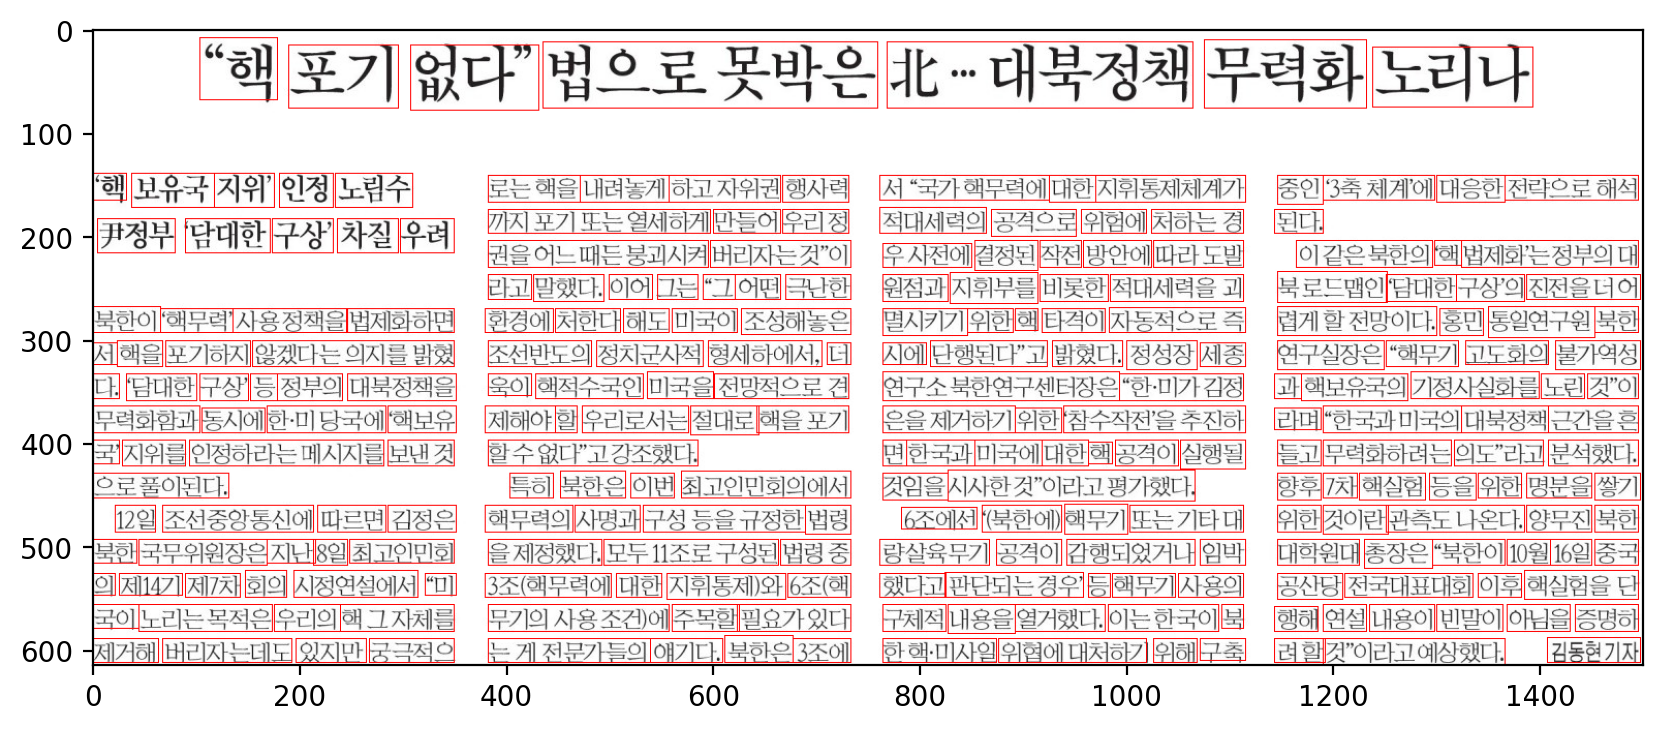

In [289]:
boxes = []


f = open("./result/res_img6.txt", 'r')
image = np.array(Image.open("./img/img6.jpg"))

box_x = []
box_y = []
box_width = []
box_height = []

while True:
    line = f.readline()
    if not line: break
    coord = line.strip().split(",")
    coord = [int(item) for item in coord]
#     print(coord)
    box_x.append(coord[0])
    box_y.append(coord[1])
    box_width.append(coord[2] - coord[0])
    box_height.append(coord[5] - coord[1])

    box_angle_x = max(abs(coord[4] - coord[2]), abs(coord[6] - coord[0]))
    box_angle_y = max(abs(coord[7] - coord[5]), abs(coord[3] - coord[1]))
    
    x1 = min(coord[0], coord[6])
    y1 = max(coord[1], coord[3])
    x2 = min(coord[2], coord[4])
    y2 = min(coord[5], coord[7])
    
    if box_angle_x < 5 or box_angle_y < 5 :
        cv2.rectangle(image,(coord[0], coord[1]),(coord[2],coord[5]),(255,0,0)) 
        boxes.append(box(x1, y1, x2, y2))
    
print("CRAFT 초기모습")
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.dpi"] = 200
plt.imshow(image)

cv2.imwrite("./img/bounding/img{}_0_initial.jpg".format(6), image)

f.close()

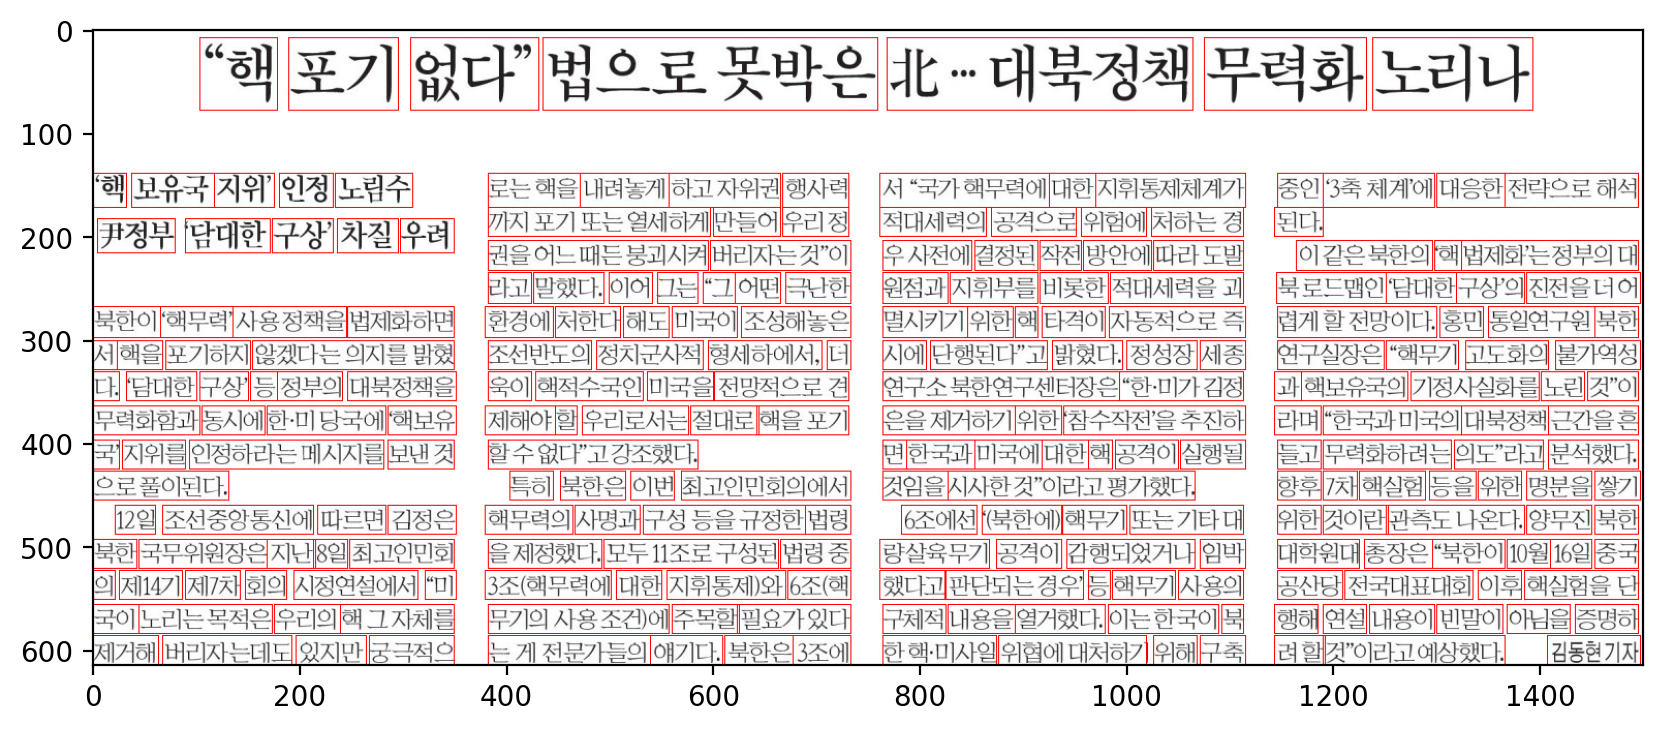

In [290]:
# 2. 줄 단위로 box 세로 길이 맞추기 

image = np.array(Image.open("./img/img6.jpg"))

onelines = []
oneline = box(-1, -1, -1, -1)
idx = 0


for i in range(0, len(boxes)) :     
    
    if i != 0 and (abs(boxes[i].y1 - boxes[i-1].y1) >= boxes[i].y2 - boxes[i].y1):
        onelines.append(oneline)
        for j in range(idx, i) :
            boxes[j].y1 = oneline.y1
            boxes[j].y2 = oneline.y2
        idx = i
        oneline = box(-1, -1, -1, -1)
    elif i != 0 and (boxes[i].y2 - oneline.y1) > 40 and boxes[i].y2 - boxes[i].y1 < 35:
        onelines.append(oneline)
        for j in range(idx, i) :
            boxes[j].y1 = oneline.y1
            boxes[j].y2 = oneline.y2
        idx = i
        oneline = box(-1, -1, -1, -1)

    if boxes[i].x1 < oneline.x1 or oneline.x1 == -1 :
        oneline.x1 = boxes[i].x1
    if boxes[i].y1 < oneline.y1 or oneline.y1 == -1 :
        oneline.y1 = boxes[i].y1
    if boxes[i].x2 > oneline.x2 or oneline.x2 == -1 :
        oneline.x2 = boxes[i].x2
    if boxes[i].y2 > oneline.y2 or oneline.y2 == -1 :
        oneline.y2 = boxes[i].y2

onelines.append(oneline)
for j in range(idx, len(boxes)) :
    boxes[j].y1 = oneline.y1
    boxes[j].y2 = oneline.y2


for boxb in boxes : 
    cv2.rectangle(image,(boxb.x1,boxb.y1),(boxb.x2,boxb.y2),(255,0,0))    

# for oneline in onelines : 
#     cv2.rectangle(image,(oneline.x1,oneline.y1),(oneline.x2,oneline.y2),(255,0,0))  

cv2.imwrite("./img/bounding/img{}_1_fixY.jpg".format(6), image)

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.dpi"] = 200
plt.imshow(image)
# cv2_imshow(image)
f.close()


In [291]:
# x로 정렬 

from operator import itemgetter, attrgetter
boxes = sorted(boxes, key = attrgetter('y2', 'x1'))

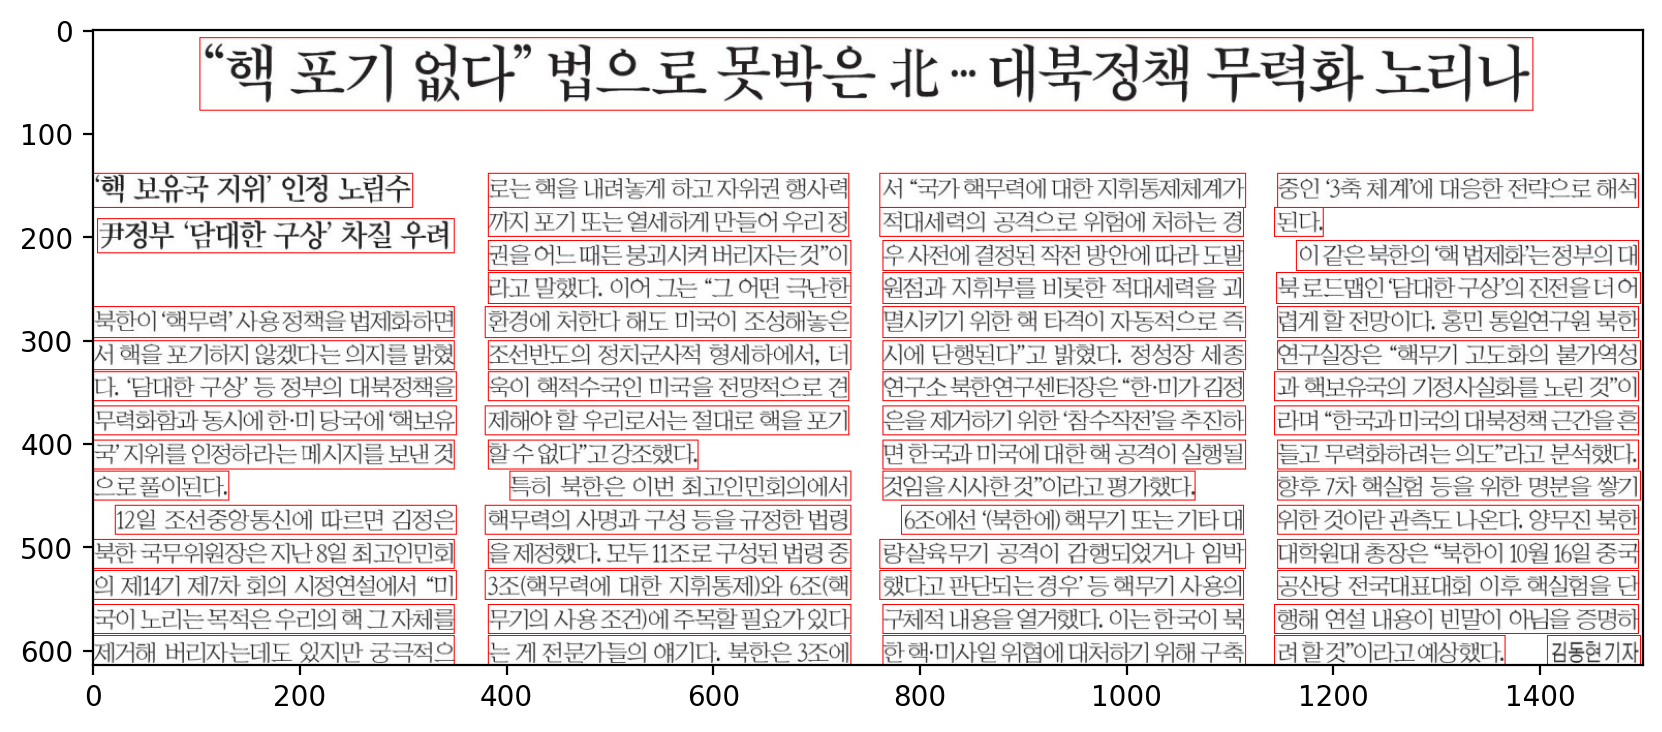

In [292]:
#box oneline으로 정렬

image = np.array(Image.open("./img/img6.jpg"))
onelines = []
oneline = box(-1, -1, -1, -1)
box_diff = -1
idx = 0
num = 0

for i in range(0, len(boxes)) :        
    yflag = 0
    if i != 0 and abs(boxes[i].y1 - boxes[i-1].y1) >= boxes[i].y2 - boxes[i].y1 :
        cv2.rectangle(image,(oneline.x1,oneline.y1),(oneline.x2,oneline.y2),(255,0,0))
        onelines.append(oneline)
        oneline = box(boxes[i].x1, boxes[i].y1, boxes[i].x2, boxes[i].y2)
        yflag = 1
        
    if i != 0 and abs(boxes[i].x1 - boxes[i-1].x2) >= 25 and boxes[i].y2 - boxes[i].y1 < 35: #박스간격이 특정값보다 크면 out
        if yflag == 0 : 
            cv2.rectangle(image,(oneline.x1,oneline.y1),(oneline.x2,oneline.y2),(255,0,0))
            onelines.append(oneline)
            oneline = box(boxes[i].x1, boxes[i].y1, boxes[i].x2, boxes[i].y2)

    if boxes[i].x1 < oneline.x1 or oneline.x1 == -1 :
        oneline.x1 = boxes[i].x1
    if boxes[i].y1 < oneline.y1 or oneline.y1 == -1 :
        oneline.y1 = boxes[i].y1
    if boxes[i].x2 > oneline.x2 or oneline.x2 == -1 :
        oneline.x2 = boxes[i].x2
    if boxes[i].y2 > oneline.y2 or oneline.y2 == -1 :
        oneline.y2 = boxes[i].y2


cv2.rectangle(image,(oneline.x1,oneline.y1),(oneline.x2,oneline.y2),(255,0,0))
cv2.imwrite("./img/bounding/img{}_2_fixX.jpg".format(6), image)

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.dpi"] = 200
plt.imshow(image)

In [293]:
class column : 
    def __init__(self, min_num, max_num, id) :
        self.min_num = min_num
        self.max_num = max_num
        self.id = id
        self.lines = []
    def add_line(self, line) : 
        self.lines.append(line)
        if line.x1 < self.min_num : 
            self.min_num = line.x1
        if line.x2 > self.max_num : 
            self.max_num = line.x2

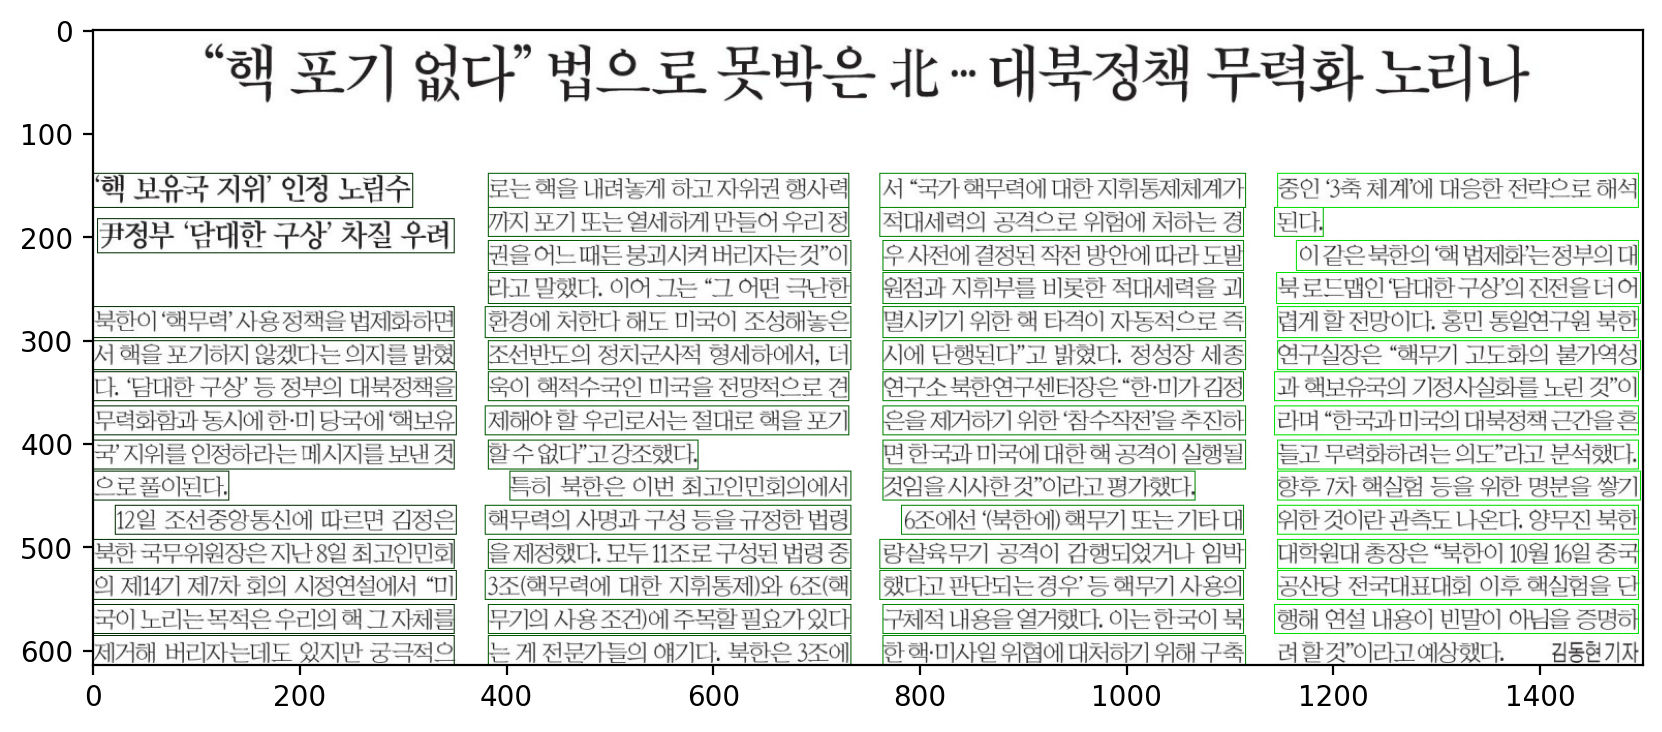

In [300]:
# column 화


mainlines = onelines[1:-1]
columns = []
id = 0

for line in sorted(mainlines, key = attrgetter('x1', 'y1')) : 
    if len(columns) == 0 or ((line.x1 + line.x2)/2) > columns[-1].max_num : 
        columns.append(column(line.x1, line.x2, id))
        id += 1
    columns[-1].add_line(line)
    
image = np.array(Image.open("./img/img6.jpg"))

for i in range(0, len(columns)) : 
    for line in columns[i].lines :
        cv2.rectangle(image,(line.x1,line.y1),(line.x2, line.y2), (0,225*(i+1)/len(columns),0))

cv2.imwrite("./img/bounding/img{}_3_column.jpg".format(6), image)

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.dpi"] = 200
plt.imshow(image)




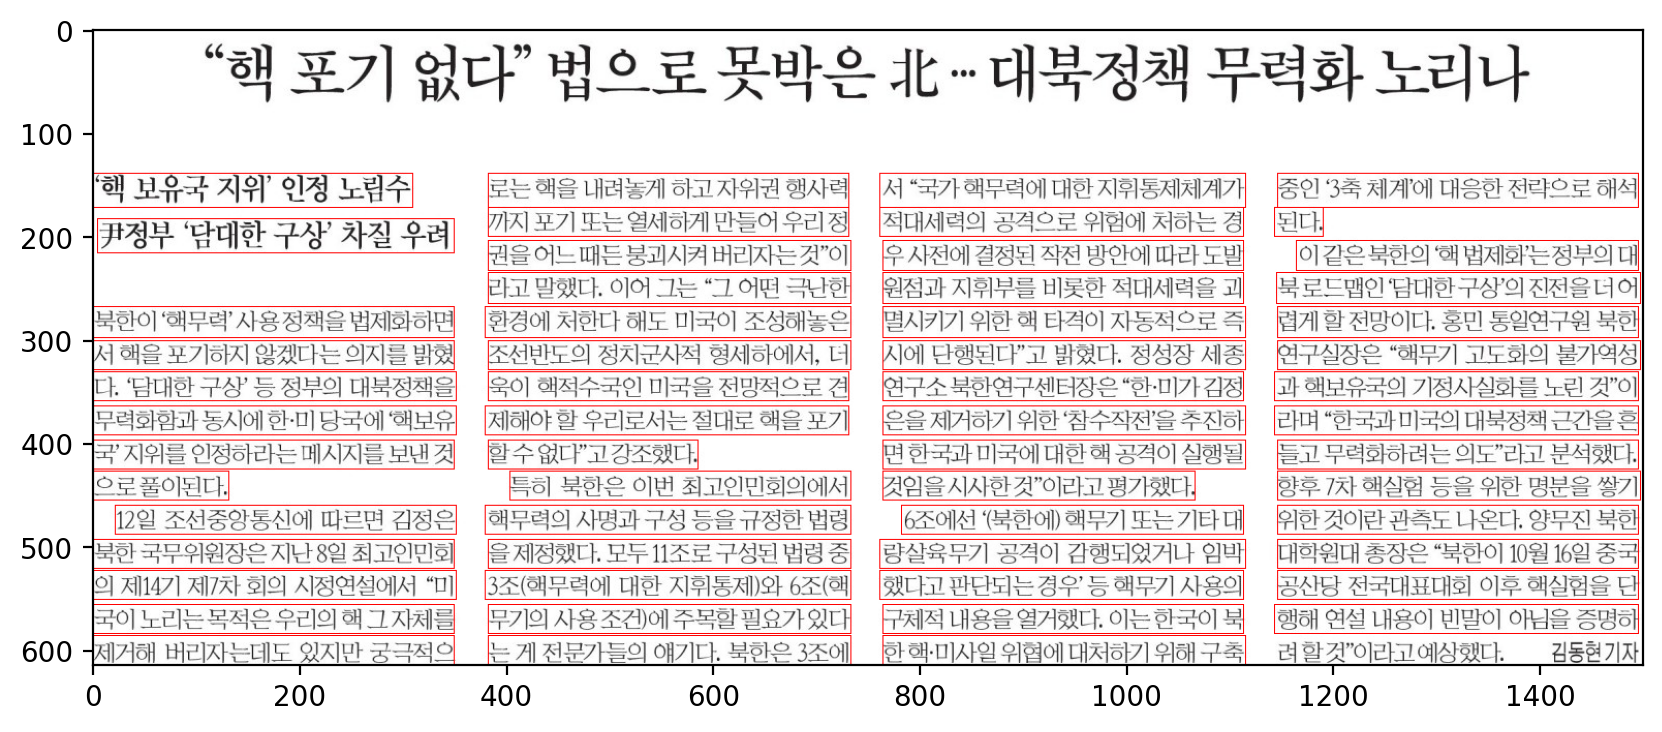

In [315]:
image = np.array(Image.open("./img/img6.jpg"))

for column in columns :
    oneline_image = image.copy()
    lines = sorted(column.lines, key = attrgetter('y1', 'y2')) 
    for i in range(0,len(lines)): 
        cv2.rectangle(image,(lines[i].x1,lines[i].y1),(lines[i].x2, lines[i].y2), (255,0,0))
        oneline_image = oneline_image[lines[i].x1:lines[i].x2, lines[i].y1:lines[i].y2]
        cv2.imwrite("./img/bounding/oneline/img{}/{}.jpg".format(6,i), image)


plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.dpi"] = 200
plt.imshow(image)





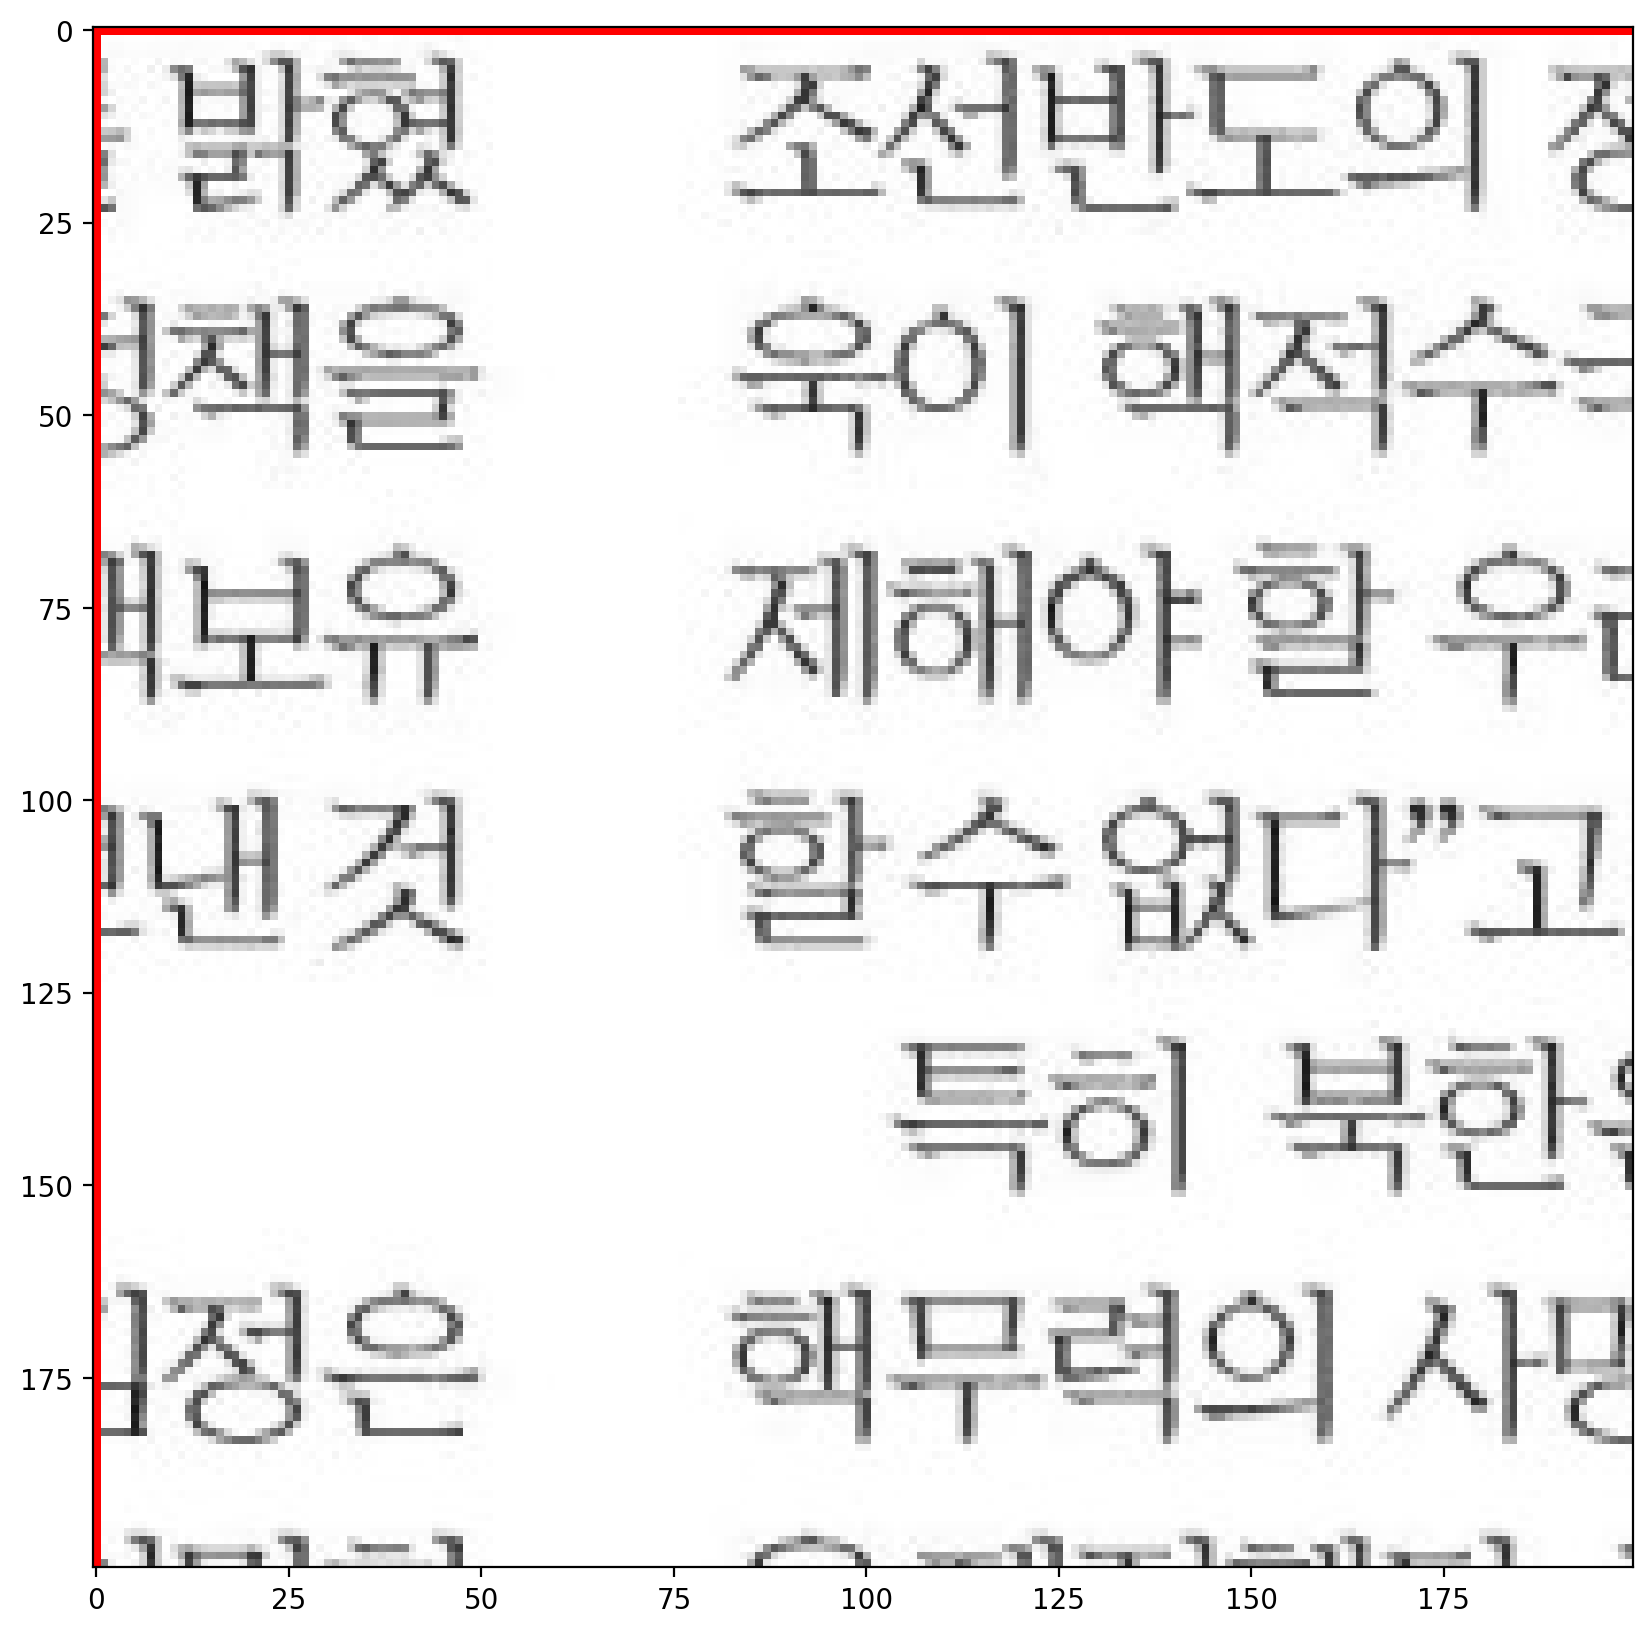

In [314]:
image = np.array(Image.open("./img/img6.jpg"))
cv2.rectangle(image,(300,300),(500, 500), (255,0,0))

image = image[300:500, 300:500]
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.dpi"] = 200
plt.imshow(image)
